In [1]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp

from classes.ns import NeutronStar
from classes.particles import Particles
from classes.axionstar import AxionStar
from classes.minicluster import AxionMiniclusterNFW

from scripts.basic_functions import output_dir
from scripts.orbits import evolve
from scripts.conversion import conversion_probabilities, divide_into_singles, find_all_hits
from scripts.event import choose_clump, axions_per_traj, add_to_readme

plt.rcParams['figure.figsize'] = [24, 16]

In [2]:
############################## Define parameters here ###################################

M_NS, R_NS = 1, 10

MC_or_AS = 'MC'
Mass = 1.   # In units of 10^{-10} M_solar or 10^{-12} M_solar
vy_in, b = -200., 0.2   # b in units of MC.radius_trunc() or AS.radius99()
delta, concentration = 1.55, 100

length, nparticles, batch_size, conservation_check = np.array([-1,1])/300, int(1.e6), int(1.e3), False

In [3]:
# %%time

# ############################ Compute trajectories ###########################################

# chosen_clump = choose_clump(Mass, vy_in, b, MC_or_AS = MC_or_AS, delta = delta, concentration = concentration)
# NS = NeutronStar(M_NS, R_NS)

# if __name__ == '__main__':
#     mp.freeze_support()
#     ncores = mp.cpu_count()
#     pool = mp.Pool(ncores)

#     event, conservation_check_result, mass_in, total_drawn = evolve(NS, chosen_clump, pool, nparticles, length = length, batch_size=batch_size, conservation_check = conservation_check)

# part_trajs = np.load(output_dir + event + '/' + event + '.npy')
# naxions_per_traj = axions_per_traj(chosen_clump, total_drawn, mass_in)
# add_to_readme(event, part_trajs, chosen_clump, naxions_per_traj, conservation_check, conservation_check_result, length = length)

In [4]:
NS = NeutronStar(M_NS, R_NS)

event = 'MCNFWOBLMFX'
part_trajs = np.load(output_dir + event + '/' + event + '.npy')
nparticles = int(part_trajs[-1][0]) + 1

Text(0, 0.5, 'x')

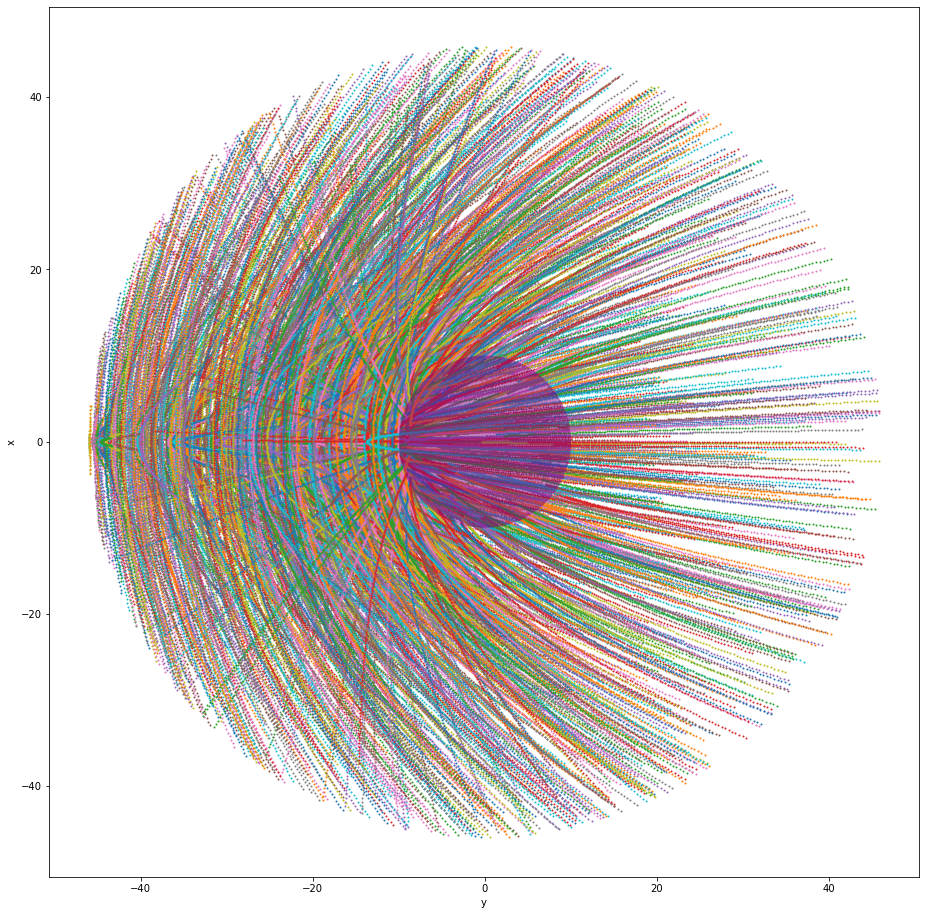

In [13]:
############################ Plot some trajectories ###########################################

ax = plt.gca()
ax.set_aspect('equal')
nsamples = np.min([int(1e3), nparticles])
part_trajs_cut = part_trajs[:int(nsamples*float(len(part_trajs))/nparticles)]
for i in np.arange(int(part_trajs_cut[-1][0])):
    traj_chosen = np.array([[part_traj[3], part_traj[2]] for part_traj in part_trajs_cut if part_traj[0] == i]).T
    ax.scatter(traj_chosen[0], traj_chosen[1], s = 1)

circle1 = plt.Circle((0, 0), NS.radius, facecolor='purple', alpha = 0.5)
ax.add_patch(circle1)
ax.set_aspect('equal')

plt.xlabel('y')
plt.ylabel('x');
# plt.savefig(output_dir + event + '/' + event + '.png')

In [5]:
%%time

############################ Conversion in the NS magnetosphere #####################################

# single_particles = divide_into_singles(part_trajs)

# if __name__ == '__main__':
#     mp.freeze_support()
#     ncores = mp.cpu_count()
#     pool = mp.Pool(ncores)
    
#     all_hits = find_all_hits(single_particles, NS, pool)

# np.save(output_dir + event + '/' + event + '_conversion.npy', all_hits)

all_hits = np.load(output_dir + event + '/' + event + '_conversion.npy')

CPU times: user 160 µs, sys: 34.5 ms, total: 34.6 ms
Wall time: 34.7 ms


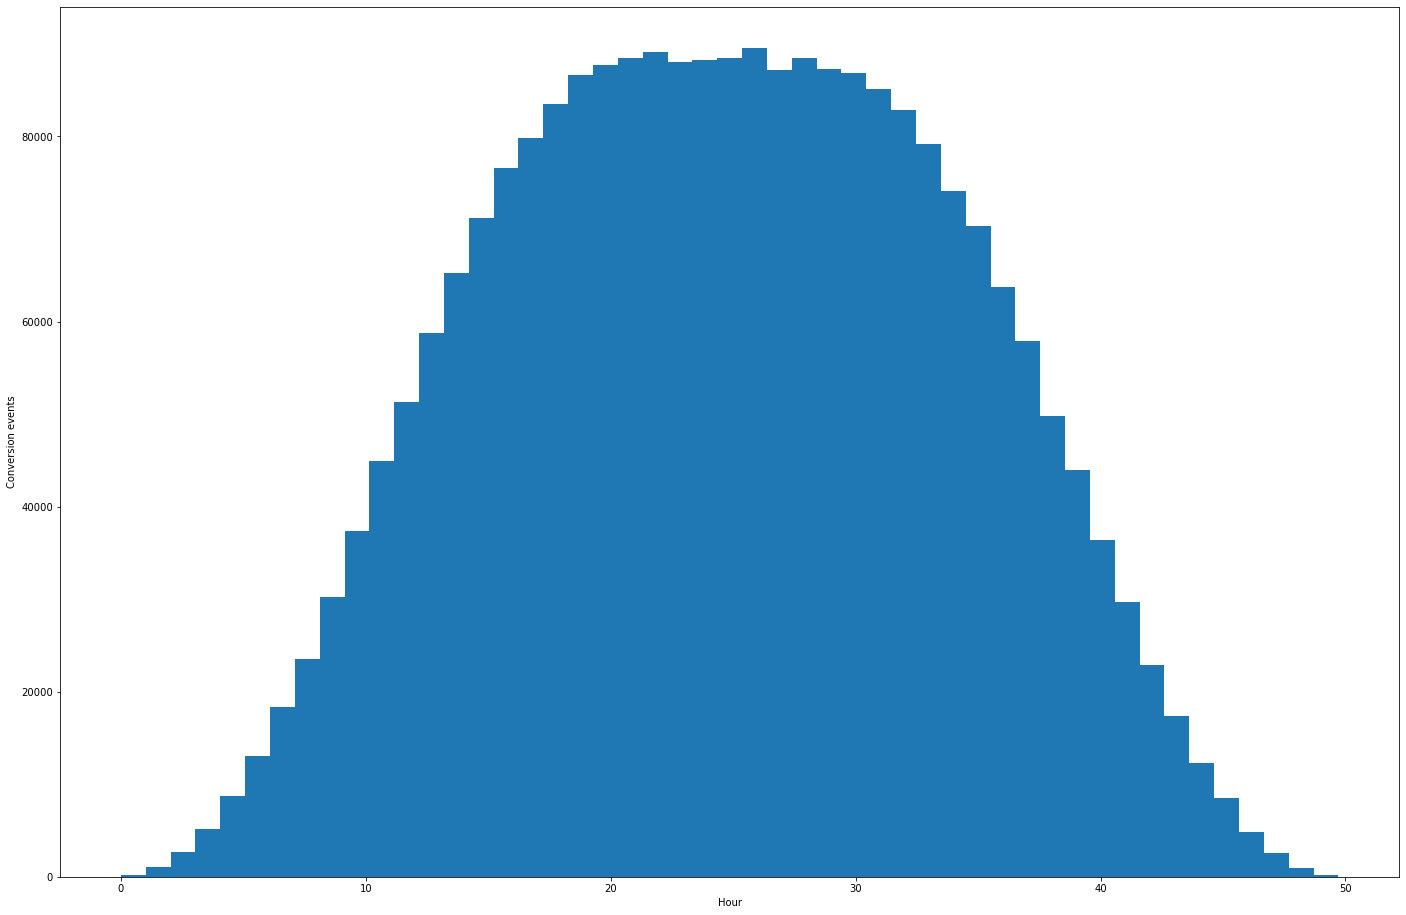

In [6]:
############################ Histogram of hits with time ###########################################

all_ts = np.array(all_hits).T[1]
all_ts -= np.min(all_ts)
all_ts /= 3600.
plt.hist(all_ts, bins=np.linspace(0, np.max(all_ts), int(np.max(all_ts)) + 1));
plt.xlabel('Hour')
plt.ylabel('Conversion events');

# plt.savefig(output_dir + event + '/' + event + '_hist.png')

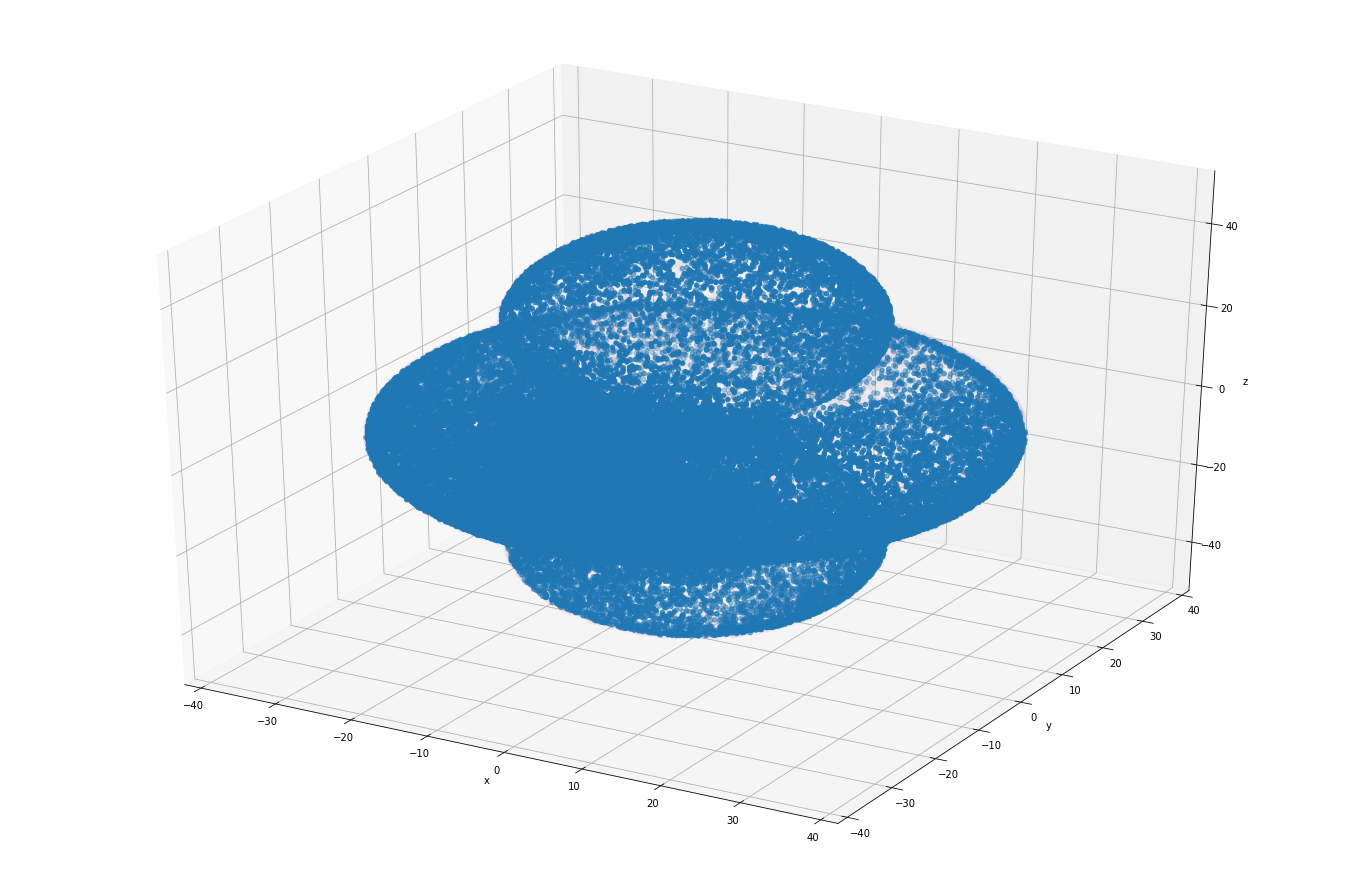

In [7]:
############################ Plot conversion surface ###########################################

chosen_hour = int(all_ts[-1]/2)
indices = np.where(np.logical_and(np.sort(all_ts) > chosen_hour, np.sort(all_ts) < chosen_hour + 1))[0]
chosen_hits = all_hits[indices[0]: indices[-1]]

X, Y, Z = np.array(chosen_hits).T[2:5]
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z);

Xsurf, Ysurf, Zsurf = NS.conversion_surface_est(0., Particles.axionmass).T
ax.scatter3D(Xsurf, Ysurf, Zsurf, c = 'purple', alpha = 0.01, s = 100);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');

# plt.savefig(output_dir + event + '/' + event + '_conversion.png')

In [22]:
############################ Conversion probabilities ###########################################

gag = 1. # In units of 10^{-14} GeV-1

if __name__ == '__main__':
    mp.freeze_support()
    ncores = mp.cpu_count()
    pool = mp.Pool(ncores)
    
    probabilities = conversion_probabilities(all_hits, gag, NS, pool, epsilon = 1e-8)

data = []
for i, hit in enumerate(all_hits):
    data.append(np.append(hit, probabilities[i]))

np.save(output_dir + event + '/' + event + '_conversion.npy', data)

/cfs/home/guvi3498/axionns/scripts/conversion.py:105: RuntimeWarning: divide by zero encountered in double_scalars
/cfs/home/guvi3498/axionns/scripts/conversion.py:105: RuntimeWarning: divide by zero encountered in double_scalars
